# Initial project 2025  
## Part 1: Supervised classification and regression
### Chamilla Terp

In [2]:
# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patches as patches

# Importing sklearn libraries
import sklearn
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, log_loss, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

# For optimizing hyper parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For selecting features
import shap

# Importing other libraries to measure time and create loading bars
from tqdm.notebook import tqdm
import time

# Statistical libraries
from scipy import stats

In [3]:
path = '/Users/ChamillaTerp/Dropbox/Skole/Master/Applied Machine Learning/AppliedML2025/Initial project'

def load_csv_data(name):
    return pd.read_csv(f'{path}/{name}')

training = load_csv_data('AppML_InitialProject_train.csv')
test_class = load_csv_data('AppML_InitialProject_test_classification.csv')
test_reg = load_csv_data('AppML_InitialProject_test_regression.csv')

In [4]:
print(f'Shape of training dataset: {training.shape}')
print(f'Shape of test classification dataset: {test_class.shape}')
print(f'Shape of test regression dataset: {test_reg.shape}')

Shape of training dataset: (180000, 142)
Shape of test classification dataset: (60000, 140)
Shape of test regression dataset: (40000, 140)


In [5]:
# Defining variables 
all_variables = ['averageInteractionsPerCrossing', 'p_Rhad1', 'p_Rhad', 'p_f3', 'p_weta2', 'p_Rphi', 'p_Reta', 'p_Eratio', 'p_f1', 'p_TRTPID', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_TRTTrackOccupancy', 'p_numberOfTRTXenonHits', 'p_z0', 'p_d0', 'p_sigmad0', 'p_dPOverP', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_etcone20', 'p_etcone30', 'p_etcone40', 'p_ptcone20', 'p_ptcone30', 'p_ptcone40', 'p_ptPU30', 'p_vertex', 'pX_E7x7_Lr2', 'pX_E7x7_Lr3', 'pX_E_Lr0_HiG', 'pX_E_Lr0_MedG', 'pX_E_Lr1_HiG', 'pX_E_Lr1_LowG', 'pX_E_Lr1_MedG', 'pX_E_Lr2_HiG', 'pX_E_Lr2_LowG', 'pX_E_Lr2_MedG', 'pX_E_Lr3_HiG', 'pX_E_Lr3_MedG', 'pX_MultiLepton', 'pX_OQ', 'pX_ambiguityType', 'pX_asy1', 'pX_author', 'pX_barys1', 'pX_core57cellsEnergyCorrection', 'pX_deltaEta0', 'pX_deltaEta1', 'pX_deltaEta2', 'pX_deltaEta3', 'pX_deltaPhi0', 'pX_deltaPhi1', 'pX_deltaPhi2', 'pX_deltaPhi3', 'pX_deltaPhiFromLastMeasurement', 'pX_deltaPhiRescaled0', 'pX_deltaPhiRescaled1', 'pX_deltaPhiRescaled3', 'pX_e1152', 'pX_e132', 'pX_e235', 'pX_e255', 'pX_e2ts1', 'pX_ecore', 'pX_emins1', 'pX_etcone20', 'pX_etcone30', 'pX_etcone40', 'pX_f1core', 'pX_f3core', 'pX_maxEcell_energy', 'pX_maxEcell_gain', 'pX_maxEcell_time', 'pX_maxEcell_x', 'pX_maxEcell_y', 'pX_maxEcell_z', 'pX_nCells_Lr0_HiG', 'pX_nCells_Lr0_MedG', 'pX_nCells_Lr1_HiG', 'pX_nCells_Lr1_LowG', 'pX_nCells_Lr1_MedG', 'pX_nCells_Lr2_HiG', 'pX_nCells_Lr2_LowG', 'pX_nCells_Lr2_MedG', 'pX_nCells_Lr3_HiG', 'pX_nCells_Lr3_MedG', 'pX_neflowisol20', 'pX_neflowisol30', 'pX_neflowisol40', 'pX_neflowisolcoreConeEnergyCorrection', 'pX_pos', 'pX_pos7', 'pX_poscs1', 'pX_poscs2', 'pX_ptcone20', 'pX_ptcone30', 'pX_ptcone40', 'pX_ptconecoreTrackPtrCorrection', 'pX_ptvarcone20', 'pX_ptvarcone30', 'pX_ptvarcone40', 'pX_r33over37allcalo', 'pX_topoetcone20', 'pX_topoetcone20ptCorrection', 'pX_topoetcone30', 'pX_topoetcone30ptCorrection', 'pX_topoetcone40', 'pX_topoetcone40ptCorrection', 'pX_topoetconecoreConeEnergyCorrection', 'pX_weta1', 'pX_widths1', 'pX_wtots1', 'pX_e233', 'pX_e237', 'pX_e2tsts1', 'pX_ehad1', 'pX_emaxs1', 'pX_fracs1', 'pX_DeltaE', 'pX_E3x5_Lr0', 'pX_E3x5_Lr1', 'pX_E3x5_Lr2', 'pX_E3x5_Lr3', 'pX_E5x7_Lr0', 'pX_E5x7_Lr1', 'pX_E5x7_Lr2', 'pX_E5x7_Lr3', 'pX_E7x11_Lr0', 'pX_E7x11_Lr1', 'pX_E7x11_Lr2', 'pX_E7x11_Lr3', 'pX_E7x7_Lr0', 'pX_E7x7_Lr1', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge']
print(f'Number of features: {len(all_variables)}')

Number of features: 140


### Classification using MPLClassifier

In [6]:
# Defining training and test set
X_train_unscaled = training[all_variables]
y_truth_e = training['p_Truth_isElectron']
y_truth_energy = training['p_Truth_Energy']

# Test sample
X_test_unscaled = test_class[all_variables]

print(f'Shape of unscaled training dataset: {X_train_unscaled.shape}')
print(f'Shape of y_truth_e: {y_truth_e.shape}')
print(f'Shape of y_truth_energy: {y_truth_energy.shape}')
print(f'Shape of unscaled test dataset: {X_test_unscaled.shape}')

Shape of unscaled training dataset: (180000, 140)
Shape of y_truth_e: (180000,)
Shape of y_truth_energy: (180000,)
Shape of unscaled test dataset: (60000, 140)


In [7]:
# Scaling data to improve performance
scaler = preprocessing.RobustScaler().fit(X_train_unscaled)     # This fits the scaler to the training data
X_train_scaled = scaler.transform(X_train_unscaled)             # This transforms the training data
X_test_class_scaled = scaler.transform(X_test_unscaled)         # This transforms the test data

#### Choosing the most important 25 variables/physical parameters

In [8]:
# Training and validation split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_truth_e, test_size = 0.2, random_state = 1)

In [9]:
# Defining the model 
classifier = MLPClassifier(hidden_layer_sizes = (10, 10), activation = 'relu', solver = 'adam', max_iter = 500, random_state = 42, verbose = False, learning_rate = 'invscaling')

# Fitting the model
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate='invscaling',
              max_iter=500, random_state=42)

/var/folders/ws/45wzf3p157x_56fnsrq6bc4w0000gn/T/ipykernel_98936/3639267803.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train[:100], feature_names = all_variables, plot_type = 'bar', max_display = 10, show = False, plot_size = (10, 5))


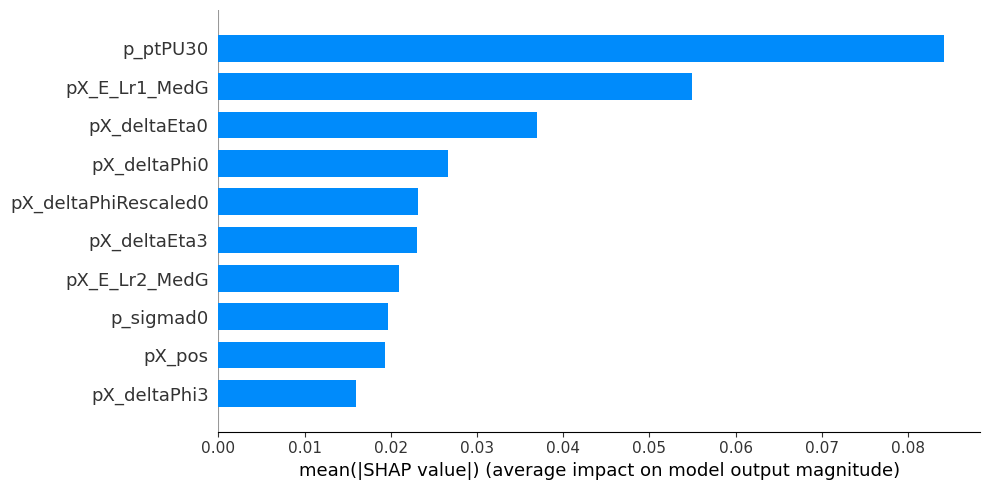

In [10]:
# SHAP values to identify important features
explainer = shap.Explainer(classifier.predict, X_train[:100])
shap_values = explainer(X_train[:100])

# Plotting SHAP values (making the plot smaller)
shap.summary_plot(shap_values, X_train[:100], feature_names = all_variables, plot_type = 'bar', max_display = 10, show = False, plot_size = (10, 5))

In [11]:
mean_shap_values = np.abs(shap_values.values).mean(axis = 0)
sorted_indicies = np.argsort(mean_shap_values)
sorted_shap = mean_shap_values[sorted_indicies][-25:][::-1]                   # This gets the top 25 features
sorted_shap_names = np.array(all_variables)[sorted_indicies][-25:][::-1]      # This gets the names of the top 25 features

# Printing the top 25 features using Pandas
print('--------- Top 25 features ---------')
top_25_features = pd.Series(sorted_shap, index = sorted_shap_names)
display(top_25_features)

--------- Top 25 features ---------


p_ptPU30                          0.08415
pX_E_Lr1_MedG                     0.05490
pX_deltaEta0                      0.03700
pX_deltaPhi0                      0.02660
pX_deltaPhiRescaled0              0.02315
pX_deltaEta3                      0.02300
pX_E_Lr2_MedG                     0.02095
p_sigmad0                         0.01965
pX_pos                            0.01935
pX_deltaPhi3                      0.01595
p_TRTPID                          0.01470
pX_widths1                        0.01335
pX_MultiLepton                    0.01135
pX_deltaPhiRescaled3              0.01110
pX_ecore                          0.00895
pX_weta1                          0.00840
pX_pos7                           0.00770
pX_deltaPhiFromLastMeasurement    0.00655
pX_deltaPhi1                      0.00645
pX_deltaPhi2                      0.00620
p_d0                              0.00620
p_numberOfInnermostPixelHits      0.00515
pX_ambiguityType                  0.00505
p_Rhad                            

In [12]:
# Choosing which parameters to include in the model
N = [5, 10, 12, 15, 20, 22, 25]                                     # Number of parameters to test

accuracy = []                                                       # List to store accuracy
computing_time = []                                                 # List to store computing time

fpr = []                                                            # List to store false positive rate
tpr = []                                                            # List to store true positive rate
roc_auc = []                                                        # List to store area under the curve

# Making the training data a Pandas DataFrame to easily access the columns
X_dataframe = pd.DataFrame((X_train_scaled), columns = all_variables)

# Looping through the number of parameters
for n in tqdm(N):

    # Selecting the top n features
    X_features_n = X_dataframe[sorted_shap_names[:n]]

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_features_n, y_truth_e, test_size = 0.2, random_state = 1)

    # Fitting the model and timing it 
    start = time.time()
    classifier = MLPClassifier(hidden_layer_sizes = (10, 10), activation = 'relu', solver = 'adam', max_iter = 500, random_state = 42, verbose = False, learning_rate = 'invscaling')
    classifier.fit(X_train, y_train)                                                # Fitting the model
    end = time.time()

    computing_time.append(end - start)                                              # Appending the time to the list

    # Getting the accuracy 
    y_pred = classifier.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))                                  # Appending the accuracy to the list

    # Getting the false positive rate, true positive rate, and area under the curve
    predictions = classifier.predict_proba(X_val)                                   # This gets the predicted probabilities
    predictions = pd.DataFrame(predictions, columns = ['False', 'True'])            # This makes it a DataFrame (False = not electron, True = electron)
    fpr_, tpr_, _ = roc_curve(y_val, predictions['True'])                           # This gets the false positive rate and true positive rate
    roc_auc_ = auc(fpr_, tpr_)                                                      # This gets the area under the curve

    fpr.append(fpr_)                                                                # Appending the false positive rate to the list
    tpr.append(tpr_)                                                                # Appending the true positive rate to the list
    roc_auc.append(roc_auc_)                                                        # Appending the area under the curve to the list

  0%|          | 0/7 [00:00<?, ?it/s]

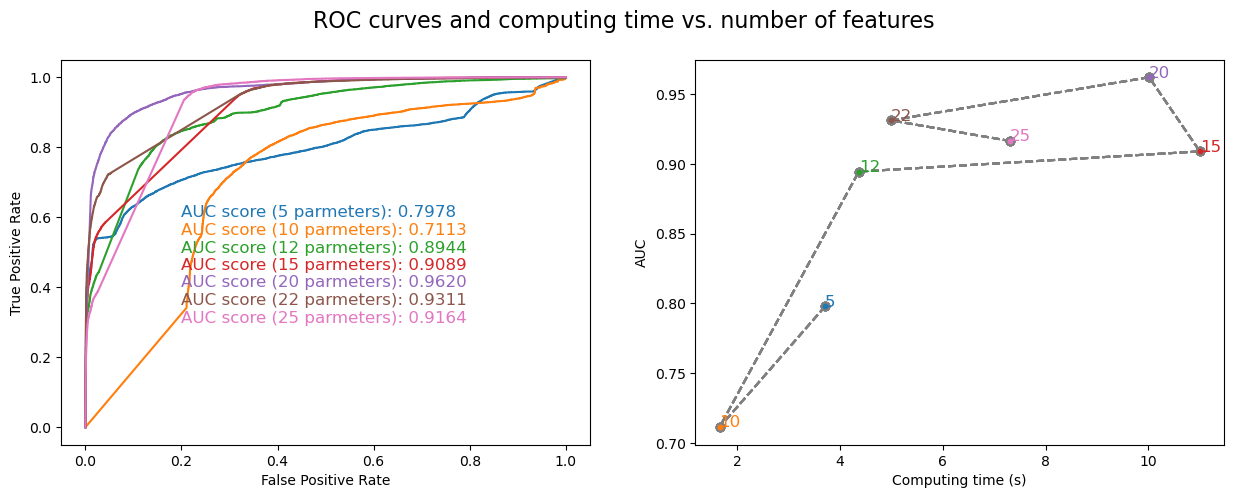

In [13]:
# Plotting ROC curves and computing time to compare the models and the number of features
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

for i in range(len(N)):
    
    # ----- Plotting ROC curves -----
    ax[0].plot(fpr[i], tpr[i], label = f'ROC curve (area = {roc_auc[i]:.2f}) with {N[i]} features')
    ax[0].set_xlabel('False Positive Rate')                                                             
    ax[0].set_ylabel('True Positive Rate')                                                              

    ax[0].text(0.2, 0.6-i/20, f'AUC score ({N[i]} parmeters): {roc_auc[i]:.4f}', color = f'C{i}', fontsize = 12)

    # Plotting AUC vs. computing time
    ax[1].plot(computing_time, roc_auc, 'o--', label = f'{N[i]} features', color = 'grey', zorder = 1)    # This plots the AUC vs. computing time
    ax[1].scatter(computing_time[i], roc_auc[i], color = f'C{i}', s = 10, zorder = 2)                     
    ax[1].text(computing_time[i], roc_auc[i], f'{N[i]}', color = f'C{i}', fontsize = 12)
    ax[1].set_xlabel('Computing time (s)')                                                              
    ax[1].set_ylabel('AUC')                                                                             
    
fig.suptitle('ROC curves and computing time vs. number of features', fontsize = 16)
plt.show()

#### Finding hyper parameters

In [14]:
# First defining the parameters we want to test (using GridSearch)
param_grid = {
    'hidden_layer_sizes': [(10, 10), (20, 20), (30, 30)],
    'max_iter': [100, 1000, 10000, 30000],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Defining the model
model_test_hyperparams = MLPClassifier(random_state = 1, activation = 'relu', solver = 'adam', verbose = False)

# Grid search
grid_search = GridSearchCV(estimator = model_test_hyperparams, param_grid = param_grid, scoring = 'accuracy', return_train_score = True, refit = True)

In [15]:
# I only want to train on that that includes the top 12 features
X_train, X_val, y_train, y_val = train_test_split(X_dataframe[sorted_shap_names[:12]], y_truth_e, test_size = 0.2, random_state = 1)

In [16]:
# Performing the grid search on dataset with 12 features
grid_search.fit(X_train, y_train);

/Applications/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the 

In [17]:
# Printing the results
# Making a DataFrame of the results
results = pd.DataFrame(grid_search.cv_results_)
display(results.head(10))                               # This shows the first 10 rows of the results

# Getting the best parameters
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')                # This prints the best parameters

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate,param_max_iter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.804278,0.838132,0.003169,0.000095,"(10, 10)",constant,100,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.840729,0.895174,...,0.878271,0.020254,34,0.842925,0.895825,0.879306,0.877292,0.895469,0.878163,0.019262
1,10.960389,3.410004,0.003177,0.000102,"(10, 10)",constant,1000,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.847118,0.899444,...,0.881625,0.020986,25,0.846432,0.901372,0.879306,0.872986,0.907483,0.881516,0.021804
2,10.785562,3.334688,0.003043,0.000103,"(10, 10)",constant,10000,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.847118,0.899444,...,0.881625,0.020986,25,0.846432,0.901372,0.879306,0.872986,0.907483,0.881516,0.021804
3,10.549118,3.261622,0.003076,0.000094,"(10, 10)",constant,30000,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.847118,0.899444,...,0.881625,0.020986,25,0.846432,0.901372,0.879306,0.872986,0.907483,0.881516,0.021804
4,7.751336,0.887678,0.003069,0.000057,"(10, 10)",invscaling,100,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.840729,0.895174,...,0.878271,0.020254,34,0.842925,0.895825,0.879306,0.877292,0.895469,0.878163,0.019262
5,10.560158,3.336475,0.003032,0.000064,"(10, 10)",invscaling,1000,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.847118,0.899444,...,0.881625,0.020986,25,0.846432,0.901372,0.879306,0.872986,0.907483,0.881516,0.021804
6,11.097610,3.721605,0.004122,0.002104,"(10, 10)",invscaling,10000,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.847118,0.899444,...,0.881625,0.020986,25,0.846432,0.901372,0.879306,0.872986,0.907483,0.881516,0.021804
7,10.826753,3.462239,0.003262,0.000272,"(10, 10)",invscaling,30000,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.847118,0.899444,...,0.881625,0.020986,25,0.846432,0.901372,0.879306,0.872986,0.907483,0.881516,0.021804
8,7.886814,0.911222,0.003169,0.000073,"(10, 10)",adaptive,100,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.840729,0.895174,...,0.878271,0.020254,34,0.842925,0.895825,0.879306,0.877292,0.895469,0.878163,0.019262
9,10.645494,3.346097,0.003389,0.000740,"(10, 10)",adaptive,1000,"{'hidden_layer_sizes': (10, 10), 'learning_rat...",0.847118,0.899444,...,0.881625,0.020986,25,0.846432,0.901372,0.879306,0.872986,0.907483,0.881516,0.021804


Best parameters: {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'max_iter': 1000}


#### Final model

In [18]:
# Training the model with the best parameters and the top 12 features 
classifier = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'], activation = 'relu', solver = 'adam', max_iter = best_params['max_iter'], random_state = 1, verbose = False, learning_rate = best_params['learning_rate'])
classifier.fit(X_train, y_train)                                                

# Calculating balanced accuracy score
y_pred = classifier.predict(X_val)
y_pred_proba = classifier.predict_proba(X_val)                                          # This gets the predicted probabilities
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['False', 'True'])                  # This makes it a DataFrame (False = not electron, True = electron)

print(f'Balanced accuracy score: {balanced_accuracy_score(y_val, y_pred):.4f}')         # This prints the balanced accuracy score

# Getting the false positive rate, true positive rate, and area under the curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba['True'])                                    # This gets the false positive rate and true positive rate
roc_auc = auc(fpr, tpr)                                                                 # This gets the area under the curve
print(f'Area under the curve: {roc_auc:.4f}')                                           # This prints the area under the curve

Balanced accuracy score: 0.8245
Area under the curve: 0.9566


In [19]:
# Getting the binary cross entropy (log loss)
log_loss_score = log_loss(y_val, y_pred_proba['True'])                                  
print(f'Log loss: {log_loss_score:.4f}')                                                                          

Log loss: 0.2068


Text(0.5, 1.0, 'ROC curve for MLPClassifier')

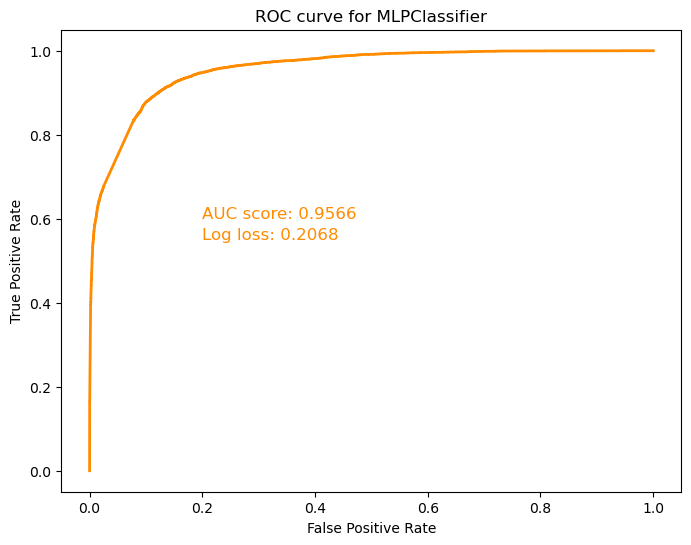

In [20]:
# Plotting the ROC curve
plt.figure(figsize = (8, 6))

plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.text(0.2, 0.6, f'AUC score: {roc_auc:.4f}', color = 'darkorange', fontsize = 12)
plt.text(0.2, 0.55, f'Log loss: {log_loss_score:.4f}', color = 'darkorange', fontsize = 12)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for MLPClassifier')

#### Making predictions on test file based on the final model

In [26]:
# Making final predictions on the test set (top 12 features)
X_test_class_features = pd.DataFrame(X_test_class_scaled, columns = all_variables)                        

X_test_class_features = X_test_class_features[sorted_shap_names[:12]]                                          
y_test_class = classifier.predict(X_test_class_features)

# Extracting the electron column (I want to save index/event number and the probability of being an electron)
y_test_class_proba = classifier.predict_proba(X_test_class_features)

final_predictions = pd.DataFrame(y_test_class_proba[:,1], columns = ['prob_electron'])            # This gets the predicted probabilities

In [27]:
# Making a csv file of the predictions
path = '/Users/ChamillaTerp/Dropbox/Skole/Master/Applied Machine Learning/AppliedML2025/Initial project/Initial Project Solutions/Classification'
final_predictions.to_csv(f'{path}/Classification_ChamillaTerp_MLPClassifier.txt', index = True, header = None, sep = ',', mode = 'w')                                                    

In [28]:
# Making a csv file with the parameters used (i.e. the top 12 features)
var_file = open(f'{path}/Classification_ChamillaTerp_MLPClassifier_VariableList.txt', 'w')   

for var in sorted_shap_names[:12]:
    var_file.write(var + '\n')

var_file.close()

### Classification using XGBoost

In [29]:
import xgboost as xgb

In [30]:
# Redefining the data to make sure we start from scratch
path = '/Users/ChamillaTerp/Dropbox/Skole/Master/Applied Machine Learning/AppliedML2025/Initial project'

training = load_csv_data('AppML_InitialProject_train.csv')
test_class = load_csv_data('AppML_InitialProject_test_classification.csv')

# Defining training and test set
X_train_unscaled = training[all_variables]
y_truth_e = training['p_Truth_isElectron']
y_truth_energy = training['p_Truth_Energy']

# Test sample
X_test_unscaled = test_class[all_variables]

scaler = preprocessing.RobustScaler().fit(X_train_unscaled)     # This fits the scaler to the training data
X_train_scaled = scaler.transform(X_train_unscaled)             # This transforms the training data
X_test_class_scaled = scaler.transform(X_test_unscaled)         # This transforms the test data

#### Selecting most important parameters

In [31]:
# Training and validation split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_truth_e, test_size = 0.2, random_state = 1)

# Defining the model
model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 5,
    random_state = 1,
    verbosity = 0
)

# Fitting the model
model.fit(X_train, y_train);

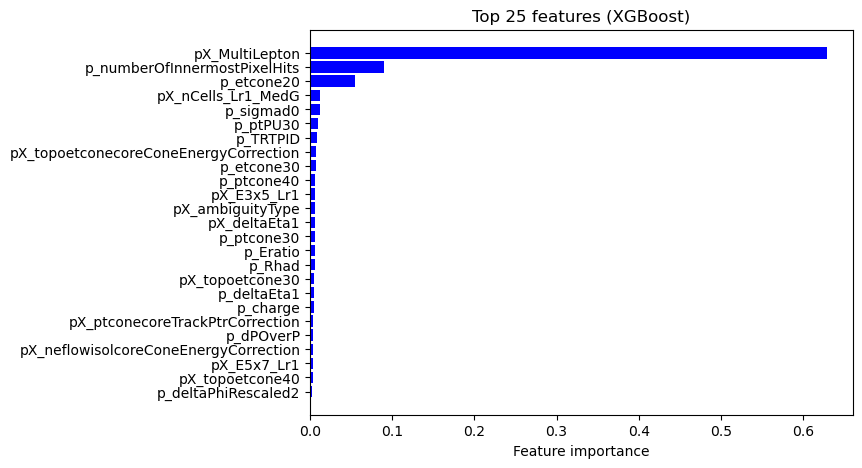

In [32]:
# Plotting feature importance
plt.figure(figsize = (7, 5))

sorted_indicies = np.argsort(model.feature_importances_)                   
plt.barh(np.array(all_variables)[sorted_indicies][-25::], model.feature_importances_[sorted_indicies][-25::], color = 'blue', align = 'center')
plt.xlabel('Feature importance')
plt.title('Top 25 features (XGBoost)');

#### Deciding on which parameters to use

/var/folders/ws/45wzf3p157x_56fnsrq6bc4w0000gn/T/ipykernel_98936/3610995556.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train, feature_names = all_variables, plot_type = 'bar', max_display = 10, show = False, plot_size = (10, 5))


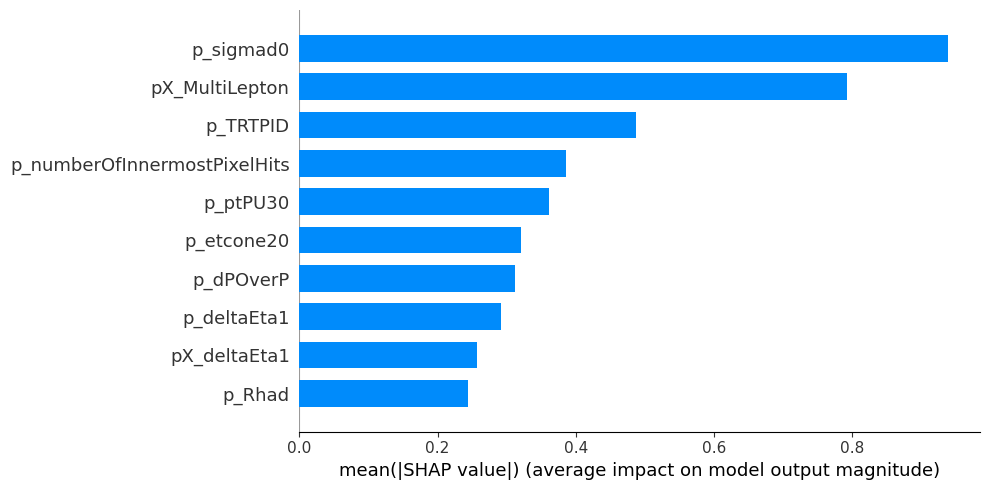

In [33]:
# SHAP values to identify important features
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Plotting
shap.summary_plot(shap_values, X_train, feature_names = all_variables, plot_type = 'bar', max_display = 10, show = False, plot_size = (10, 5))

In [34]:
mean_shap_values = np.abs(shap_values.values).mean(axis = 0)
sorted_indicies = np.argsort(mean_shap_values)
sorted_shap = mean_shap_values[sorted_indicies][-25:][::-1]                   # This gets the top 25 features
sorted_shap_names = np.array(all_variables)[sorted_indicies][-25:][::-1]      # This gets the names of the top 25 features

# Printing the top 25 features using Pandas
print('--------- Top 25 features ---------')
top_25_features = pd.Series(sorted_shap, index = sorted_shap_names)
display(top_25_features)

--------- Top 25 features ---------


p_sigmad0                          0.938180
pX_MultiLepton                     0.792136
p_TRTPID                           0.487123
p_numberOfInnermostPixelHits       0.385688
p_ptPU30                           0.360601
p_etcone20                         0.321150
p_dPOverP                          0.312582
p_deltaEta1                        0.291070
pX_deltaEta1                       0.257508
p_Rhad                             0.244653
p_d0                               0.210390
p_deltaPhiRescaled2                0.146052
p_charge                           0.114604
p_f3                               0.113147
pX_ptconecoreTrackPtrCorrection    0.109245
pX_deltaPhiFromLastMeasurement     0.101056
pX_core57cellsEnergyCorrection     0.099275
p_f1                               0.097083
pX_f3core                          0.083239
p_pt_track                         0.082502
p_ptcone40                         0.081299
pX_E3x5_Lr1                        0.080641
pX_ambiguityType                

In [35]:
# Choosing which parameters to include in the model
N = [5, 10, 12, 15, 20, 22, 25]                                     # Number of parameters to test

accuracy = []                                                       # List to store accuracy
computing_time = []                                                 # List to store computing time
fpr = []                                                            # List to store false positive rate
tpr = []                                                            # List to store true positive rate
roc_auc = []                                                        # List to store area under the curve

# Making the training data a Pandas DataFrame to easily access the columns
X_dataframe = pd.DataFrame((X_train_scaled), columns = all_variables)

# Looping through the number of parameters
for n in tqdm(N):

    # Selecting the top n features
    X_features_n = X_dataframe[sorted_shap_names[:n]]

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_features_n, y_truth_e, test_size = 0.2, random_state = 1)

    # Fitting the model and timing it 
    start = time.time()
    model = xgb.XGBClassifier(
        objective = 'binary:logistic',
        n_estimators = 100,
        learning_rate = 0.1,
        max_depth = 5,
        random_state = 1,
        verbosity = 0
    )
    model.fit(X_train, y_train)                                                 
    end = time.time()

    computing_time.append(end - start)                                              

    # Getting the accuracy 
    y_pred = model.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))                                  

    # Getting the false positive rate, true positive rate, and area under the curve
    predictions = model.predict_proba(X_val)                                  
    predictions = pd.DataFrame(predictions, columns = ['False', 'True'])            
    fpr_, tpr_, _ = roc_curve(y_val, predictions['True'])                           
    roc_auc_ = auc(fpr_, tpr_)                                                      

    fpr.append(fpr_)                                                                
    tpr.append(tpr_)                                                                
    roc_auc.append(roc_auc_)                                                        

  0%|          | 0/7 [00:00<?, ?it/s]

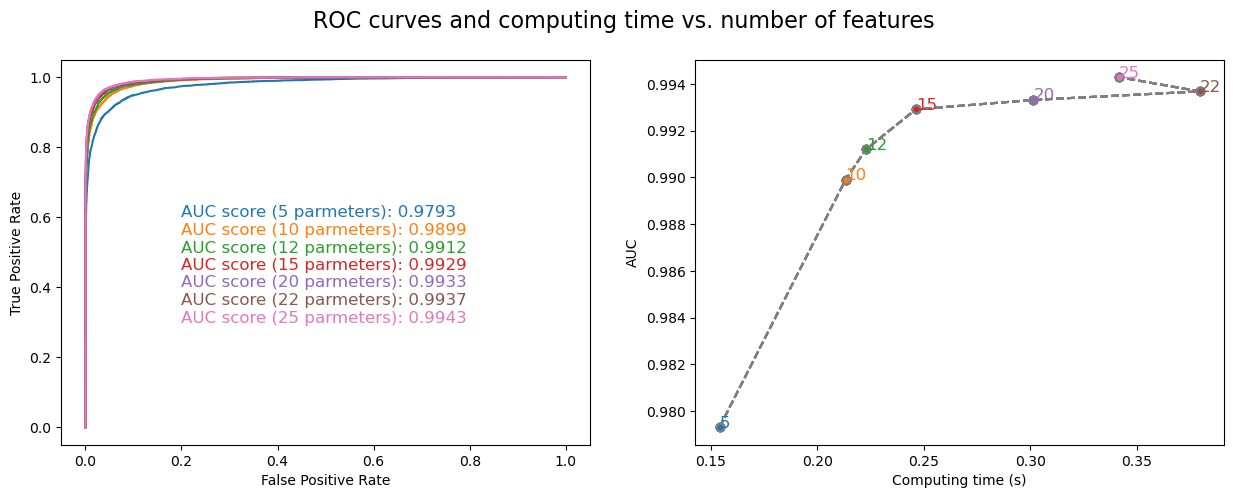

In [36]:
# Plotting ROC curves and computing time to compare the models and the number of features
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

for i in range(len(N)):
    # ----- Plotting ROC curves -----
    ax[0].plot(fpr[i], tpr[i], label = f'ROC curve (area = {roc_auc[i]:.2f}) with {N[i]} features')
    ax[0].set_xlabel('False Positive Rate')                                                             
    ax[0].set_ylabel('True Positive Rate')                                                              

    ax[0].text(0.2, 0.6-i/20, f'AUC score ({N[i]} parmeters): {roc_auc[i]:.4f}', color = f'C{i}', fontsize = 12)

    # Plotting AUC vs. computing time
    ax[1].plot(computing_time, roc_auc, 'o--', label = f'{N[i]} features', color = 'grey', zorder = 1)    
    ax[1].scatter(computing_time[i], roc_auc[i], color = f'C{i}', s = 10, zorder = 2)                     
    ax[1].text(computing_time[i], roc_auc[i], f'{N[i]}', color = f'C{i}', fontsize = 12)
    ax[1].set_xlabel('Computing time (s)')                                                              
    ax[1].set_ylabel('AUC')

fig.suptitle('ROC curves and computing time vs. number of features', fontsize = 16)
plt.show()

<b>Note:</b> Choosing to work with 15 parameters, as the AUC value increase slowly after, while the computation time just rises. 

#### Finding hyper parameters using K-fold cross validation

In [37]:
# Preparing data with 15 parameters/features
X_train, X_val, y_train, y_val = train_test_split(X_dataframe[sorted_shap_names[:15]], y_truth_e, test_size = 0.2, random_state = 1)
X_train.shape

(144000, 15)

In [38]:
print('No. electrons:', np.sum(y_truth_e))
print('No. of non-electrons', len(y_truth_e) - np.sum(y_truth_e))
print('')
print('We are working with a UNBALANCED dataset.')

No. electrons: 37800
No. of non-electrons 142200

We are working with a UNBALANCED dataset.


In [39]:
# Seeing what version of XGBoost and scikit we are using (newest version of Python (3.12.10) not yet compatible with scikit-learn!)
print(f'XGBoost version: {xgb.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')

XGBoost version: 2.1.1
Scikit-learn version: 1.5.2


In [40]:
# Random search for hyperparameters
param_distributions = {
    'n_estimators':  stats.randint(1, 400),
    'max_depth': stats.randint(1, 10),
}

n_iter = 10                                                             # Number of iterations
k = 5                                                                   # Number of folds for cross-validation

# Defining the model
model_test_hyperparams = xgb.XGBClassifier(
    objective = 'binary:logistic',
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 5,
    random_state = 1,
    verbosity = 0
)

# Random search
random_search = RandomizedSearchCV(
    estimator = model_test_hyperparams,
    param_distributions = param_distributions,
    n_iter = n_iter,
    cv = k,
    scoring = 'balanced_accuracy',
    return_train_score = True,
    refit = True,
    random_state = 1
)

# Performing the random search on dataset with 15 features
random_search.fit(X_train, y_train);

In [41]:
# Making a DataFrame of the results
results = pd.DataFrame(random_search.cv_results_)
display(results.head(10))                               

# Getting the best parameters
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f'Best parameters: {best_params},', f'Best score: {best_score}')   

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.511153,0.024767,0.021538,0.001136,6,236,"{'max_depth': 6, 'n_estimators': 236}",0.947554,0.947064,0.947925,...,0.947719,0.000646,5,0.968375,0.967949,0.968190,0.967263,0.967769,0.967909,0.000383
1,0.982952,0.049735,0.038186,0.002724,9,256,"{'max_depth': 9, 'n_estimators': 256}",0.948034,0.945754,0.946773,...,0.947176,0.001089,6,0.994198,0.994990,0.995504,0.995271,0.994939,0.994980,0.000441
2,0.684482,0.044349,0.027448,0.001726,6,336,"{'max_depth': 6, 'n_estimators': 336}",0.947857,0.946428,0.947809,...,0.947807,0.001011,4,0.975576,0.974798,0.974318,0.974945,0.975161,0.974959,0.000414
3,0.129612,0.001674,0.007086,0.000563,1,145,"{'max_depth': 1, 'n_estimators': 145}",0.909219,0.910209,0.909574,...,0.908685,0.002065,10,0.908630,0.908328,0.908927,0.910255,0.909344,0.909097,0.000670
4,0.098190,0.001206,0.006888,0.000275,2,72,"{'max_depth': 2, 'n_estimators': 72}",0.918951,0.918180,0.919966,...,0.918558,0.001910,9,0.919121,0.919598,0.919540,0.920146,0.918658,0.919413,0.000499
5,0.739488,0.048249,0.030618,0.001510,7,282,"{'max_depth': 7, 'n_estimators': 282}",0.948548,0.946396,0.946761,...,0.947998,0.001341,2,0.981362,0.980601,0.980051,0.981260,0.981148,0.980884,0.000493
6,0.361084,0.042618,0.013379,0.000793,3,277,"{'max_depth': 3, 'n_estimators': 277}",0.944239,0.943426,0.943978,...,0.943957,0.001435,7,0.948019,0.947821,0.948530,0.947566,0.947334,0.947854,0.000410
7,0.805931,0.016852,0.032436,0.001205,6,396,"{'max_depth': 6, 'n_estimators': 396}",0.947393,0.947107,0.948559,...,0.947982,0.000913,3,0.979129,0.978000,0.977939,0.979172,0.978018,0.978452,0.000571
8,0.122076,0.004509,0.008011,0.000475,3,69,"{'max_depth': 3, 'n_estimators': 69}",0.931008,0.929658,0.930689,...,0.930528,0.001196,8,0.931485,0.931474,0.931154,0.932961,0.930976,0.931610,0.000703
9,0.788598,0.072959,0.030588,0.000877,8,242,"{'max_depth': 8, 'n_estimators': 242}",0.948355,0.947327,0.947369,...,0.948030,0.001086,1,0.986052,0.987094,0.986345,0.987227,0.987471,0.986838,0.000544


Best parameters: {'max_depth': 8, 'n_estimators': 242}, Best score: 0.9480299977219403


In [42]:
# New search for hyperparameters based on the best parameters from previous search
param_distributions_2 = {
    'n_estimators': stats.randint(150, 300),
    'max_depth': stats.randint(4, 10),
}

# Defining the model
model_test_hyperparams_2 = xgb.XGBClassifier(
    objective = 'binary:logistic',
    learning_rate = 0.1,
    random_state = 1,
    verbosity = 0
)

# Random search
random_search = RandomizedSearchCV(
    estimator = model_test_hyperparams_2,
    param_distributions = param_distributions_2,
    n_iter = n_iter,
    cv = k,
    scoring = 'balanced_accuracy',
    return_train_score = True,
    refit = True,
    random_state = 1
)

# Performing the random search on dataset with 15 features
random_search.fit(X_train, y_train);

# Making a DataFrame of the results
results_2 = pd.DataFrame(random_search.cv_results_)

# Printing best parameters
best_params_2 = random_search.best_params_
best_score_2 = random_search.best_score_
print(f'Best parameters: {best_params_2},', f'Best score: {best_score_2}')              

Best parameters: {'max_depth': 7, 'n_estimators': 283}, Best score: 0.9480367891845827


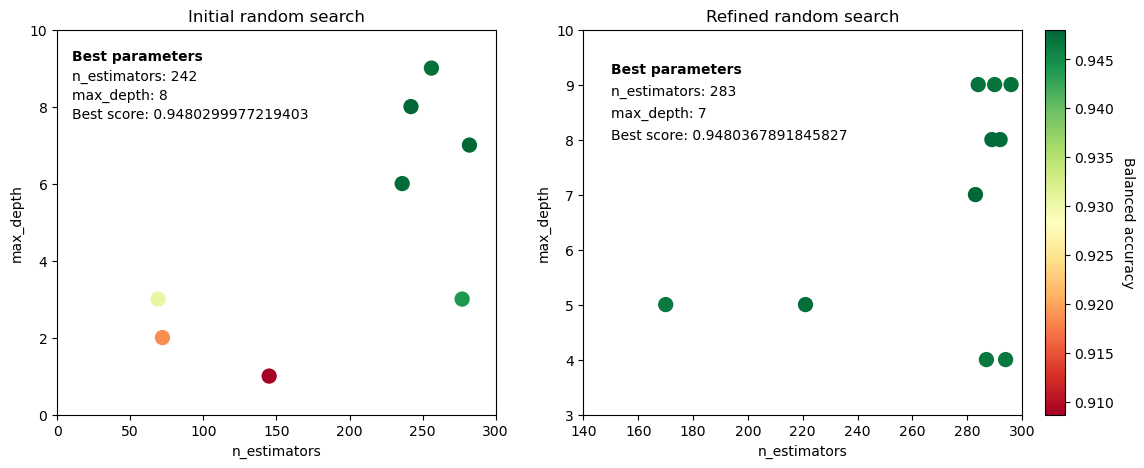

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# Plotting the results
x1, x2, color = results['param_n_estimators'], results['param_max_depth'], results['mean_test_score']
y1, y2, color2 = results_2['param_n_estimators'], results_2['param_max_depth'], results_2['mean_test_score']

min_color, max_color = np.min(np.concatenate((color, color2))), np.max(np.concatenate((color, color2)))

# Plotting first random search
ax[0].scatter(x1, x2, c = color, cmap = 'RdYlGn', s = 100, edgecolor = None, zorder = 2, vmin = min_color, vmax = max_color)
ax[0].set_xlabel('n_estimators')
ax[0].set_ylabel('max_depth')
ax[0].set_title('Initial random search')
ax[0].set_xlim([0, 300])
ax[0].set_ylim([0, 10])
ax[0].text(10, 9.2, 'Best parameters', fontsize = 10, color = 'black', weight = 'bold')
ax[0].text(10, 8.7, f'n_estimators: {best_params["n_estimators"]}', fontsize = 10, color = 'black')
ax[0].text(10, 8.2, f'max_depth: {best_params["max_depth"]}', fontsize = 10, color = 'black')
ax[0].text(10, 7.7, f'Best score: {best_score}', fontsize = 10, color = 'black')

# Plotting second random search
ax[1].scatter(y1, y2, c = color2, cmap = 'RdYlGn', s = 100, edgecolor = None, zorder = 2, vmin = min_color, vmax = max_color)
ax[1].set_xlabel('n_estimators')
ax[1].set_ylabel('max_depth')
ax[1].set_title('Refined random search')
ax[1].set_xlim([140, 300])
ax[1].set_ylim([3, 10])
ax[1].text(150, 9.2, 'Best parameters', fontsize = 10, color = 'black', weight = 'bold')
ax[1].text(150, 8.8, f'n_estimators: {best_params_2["n_estimators"]}', fontsize = 10, color = 'black')
ax[1].text(150, 8.4, f'max_depth: {best_params_2["max_depth"]}', fontsize = 10, color = 'black')
ax[1].text(150, 8.0, f'Best score: {best_score_2}', fontsize = 10, color = 'black')                             # This score corresponds to the AUC score

# Adding color bar
cbar = plt.colorbar(ax[1].collections[0], ax = ax, orientation = 'vertical', pad = 0.02)
cbar.set_label('Balanced accuracy', rotation = 270, labelpad = 15)
cbar.ax.tick_params(labelsize = 10)

#### Finding hyper parameters using Bayesian optimization

In [44]:
def XGBoost_Cross_Validation(max_depth, n_estimators, data, targets):
    """  
    Descision tree classifier with cross-validation.
    ---------- Parameters ----------
    max_depth: int, maximum depth of the tree
    n_estimators: int, number of trees
    data: DataFrame, features
    targets: Series, target variable

    """

    estimator = xgb.XGBClassifier(
        objective = 'binary:logistic',
        n_estimators = n_estimators,
        max_depth = max_depth,
        learning_rate = 0.1,
        eval_metric = 'logloss',
        random_state = 1,
        verbosity = 0
    )

    # Cross-validation
    c_val = cross_val_score(estimator, data, targets, cv = 5, scoring = 'balanced_accuracy', n_jobs = -1)
    mean_score = np.mean(c_val)

    return mean_score

In [45]:
# Importing Bayesian optimization from bayesian-optimization
from bayes_opt import BayesianOptimization

def optimize_XGBoost(data, targets, params, initial_points = 5, n_iter = 5):
    """  
    Applying Bayesian optimization to find the best hyperparameters for XGBoost.

    """

    def cross_val_wrapper(max_depth, n_estimators):
        """  
        Wrapper function for cross-validation. The parameters 'max_depth' and 'n_estimators' are passed as floats, so we need to convert them 
        to integers. 
        """
        return XGBoost_Cross_Validation(int(max_depth), int(n_estimators), data = data, targets = targets)
    
    optimizer = BayesianOptimization(f = cross_val_wrapper, pbounds = params, random_state = 1, verbose = 2)
    optimizer.maximize(init_points = initial_points, n_iter = n_iter)

    return optimizer

In [46]:
# Testing the Bayesian optimization 
params = {
    'max_depth': (1, 10),
    'n_estimators': (1, 400)
}

Bayesian_optimizer = optimize_XGBoost(X_train, y_train, params, initial_points = 6, n_iter = 9)
print(Bayesian_optimizer.max)  

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.9465    | 4.753     | 288.4     |
| 2         | 0.901     | 1.001     | 121.6     |
| 3         | 0.894     | 2.321     | 37.84     |
| 4         | 0.9303    | 2.676     | 138.9     |
| 5         | 0.9453    | 4.571     | 216.0     |
| 6         | 0.9462    | 4.773     | 274.4     |
| 7         | 0.9479    | 5.37      | 289.7     |
| 8         | 0.9473    | 9.798     | 319.4     |
| 9         | 0.9482    | 7.333     | 177.3     |
| 10        | 0.9473    | 9.78      | 374.4     |
| 11        | 0.9473    | 9.752     | 246.3     |
| 12        | 0.9406    | 2.673     | 399.8     |
| 13        | 0.9239    | 1.05      | 349.4     |
| 14        | 0.9149    | 1.106     | 195.6     |
| 15        | 0.9222    | 1.152     | 306.7     |
{'target': np.float64(0.9482494044287335), 'params': {'max_depth': np.float64(7.3326947521164945), 'n_estimators': np.float64(177.32624665963036)}}


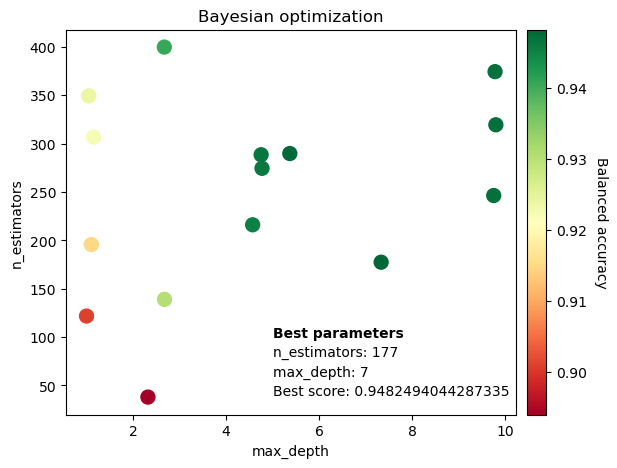

In [47]:
# Plotting
fig, ax = plt.subplots(figsize = (7, 5))

targets, max_depth, n_estimators = [], [], []

for i in range(len(Bayesian_optimizer.res)):
    targets.append(Bayesian_optimizer.res[i]['target'])                             # This corresponds to the balanced accuracy score (i.e., best score)
    max_depth.append(Bayesian_optimizer.res[i]['params']['max_depth'])
    n_estimators.append(Bayesian_optimizer.res[i]['params']['n_estimators'])

# Plotting the results
ax.scatter(max_depth, n_estimators, c = targets, cmap = 'RdYlGn', s = 100, edgecolor = None, zorder = 2)
ax.set_xlabel('max_depth')
ax.set_ylabel('n_estimators')
ax.set_title('Bayesian optimization')

# Adding color bar
cbar = plt.colorbar(ax.collections[0], ax = ax, orientation = 'vertical', pad = 0.02)
cbar.set_label('Balanced accuracy', rotation = 270, labelpad = 15)

# Getting the best parameters
best_params_bayesian = Bayesian_optimizer.max['params']

ax.text(5, 100, 'Best parameters', fontsize = 10, color = 'black', weight = 'bold')
ax.text(5, 80, f'n_estimators: {int(best_params_bayesian["n_estimators"])}', fontsize = 10, color = 'black')
ax.text(5, 60, f'max_depth: {int(best_params_bayesian["max_depth"])}', fontsize = 10, color = 'black')
ax.text(5, 40, f'Best score: {Bayesian_optimizer.max["target"]}', fontsize = 10, color = 'black')

plt.show()

#### Making the final model
Using the hyperparameters from the Bayesian optimization since it gives the best score. 

In [48]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dataframe[sorted_shap_names[:15]], y_truth_e, test_size = 0.2, random_state = 1)

In [49]:
# Choosing hyperparameters based on Bayesian optimization 
max_depth = int(best_params_bayesian['max_depth'])
n_estimators = int(best_params_bayesian['n_estimators'])

# Fitting the model
model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    n_estimators = n_estimators,
    max_depth = max_depth,
    learning_rate = 0.1,
    random_state = 1,
    verbosity = 0
)

model.fit(X_train, y_train);

# Getting the balanced accuracy
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)                                          
accuracy = balanced_accuracy_score(y_val, y_pred)
print(f'Balanced accuracy score: {accuracy:.4f}')

# Getting the false positive rate, true positive rate, and area under the curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(f'Area under the curve: {roc_auc:.4f}')
print(f'Log loss: {log_loss(y_val, y_pred_proba[:, 1]):.4f}')

Balanced accuracy score: 0.9496
Area under the curve: 0.9937
Log loss: 0.0762


Text(0.5, 1.0, 'ROC curve for XGBoost with hyperparameters from Bayesian optimization')

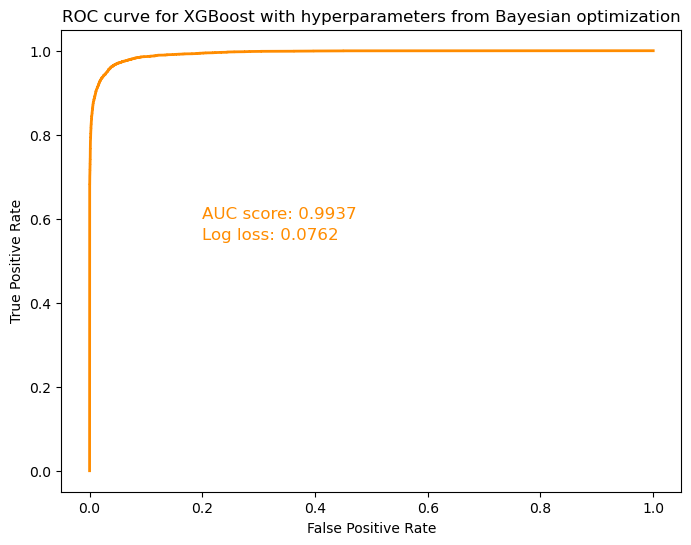

In [50]:
# Plotting the ROC curve
plt.figure(figsize = (8, 6))

plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.text(0.2, 0.6, f'AUC score: {roc_auc:.4f}', color = 'darkorange', fontsize = 12)
plt.text(0.2, 0.55, f'Log loss: {log_loss(y_val, y_pred_proba[:, 1]):.4f}', color = 'darkorange', fontsize = 12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost with hyperparameters from Bayesian optimization')

In [52]:
# Making final predictions on the test set (top 15 features)
X_test_class_features = pd.DataFrame(X_test_class_scaled, columns = all_variables)
X_test_class_features = X_test_class_features[sorted_shap_names[:15]]
y_test_class = model.predict(X_test_class_features)
# Getting the predicted probabilities
y_test_class_proba = model.predict_proba(X_test_class_features)

# Extracting the electron column
final_predictions = pd.DataFrame(y_test_class_proba[:,1], columns = ['prob_electron'])            

# Making a csv file of the predictions
path = '/Users/ChamillaTerp/Dropbox/Skole/Master/Applied Machine Learning/AppliedML2025/Initial project/Initial Project Solutions/Classification'
final_predictions.to_csv(f'{path}/Classification_ChamillaTerp_XGBoost.txt', index = True, header = None, sep = ',', mode = 'w')

# Making a csv file with the parameters used (i.e. the top 15 features)
var_file = open(f'{path}/Classification_ChamillaTerp_XGBoost_VariableList.txt', 'w')
for var in sorted_shap_names[:15]:
    var_file.write(var + '\n')

var_file.close()